<a href="https://colab.research.google.com/github/Job-market-team-AI2024/job_market_project/blob/main/Baseline/chp3_baseline_hh_it_vacancies_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [28]:
URL_BASE = 'https://media.githubusercontent.com/media/Job-market-team-AI2024/job_market_project/refs/heads/main/data/'
def read_database(file_name):
    return pd.read_csv(os.path.join(URL_BASE, file_name))

In [29]:
df = read_database('IT_vacancies.csv')
df.head()

,id,area_id,area_name,name,test_required,salary_to,salary_from,salary_gross,salary_currency,address_lat,...,accept_temporary,accept_handicapped,professional_roles_id,professional_roles_name,working_time_modes,driver_license_types,working_time_intervals,quick_responses_allowed,response_letter_required,accept_incomplete_resumes
0,85146733,2,Санкт-Петербург,Тестировщик / QA Engineer (Junior / Middle / S...,NaN,NaN,NaN,NaN,NaN,59.984924,...,False,True,124,Тестировщик,NaN,NaN,NaN,False,False,False
1,87391606,1,Москва,Ведущий Системный Аналитик Kleiber.Graphics,NaN,250000.0,230000.0,False,RUR,NaN,...,False,False,148,Системный аналитик,NaN,NaN,NaN,False,False,False
2,85896506,79,Саратов,Бизнес-аналитик,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,10,Аналитик,NaN,NaN,NaN,False,False,False
3,86876446,72,Пермь,Менеджер проектов/Аккаунт-менеджер (IT сфера) ...,NaN,NaN,NaN,NaN,NaN,58.004460,...,False,False,107,Руководитель проектов,NaN,NaN,NaN,False,False,False
4,84560508,76,Ростов-на-Дону,"Специалист службы поддержки (удаленно), Ростов...",NaN,NaN,35000.0,True,RUR,NaN,...,False,False,121,Специалист технической поддержки,NaN,NaN,NaN,False,False,False


In [30]:
df.isnull().sum()

id                               0
area_id                          0
area_name                        0
name                             0
test_required                66854
salary_to                    51222
salary_from                  41988
salary_gross                 38366
salary_currency              38360
address_lat                  33917
address_lng                  33917
address_raw                  33188
address_city                 34177
metro_line_id                52097
metro_line_name              52097
metro_station_name           52097
metro_lat                    52097
metro_lng                    52097
address_street               35086
address_building             36123
count_metro_stations         31922
metro_stations               52097
premium                          0
archived                         0
employer_id                     89
employer_name                    0
employer_trusted                 0
accredited_it_employer          89
has_test            

In [31]:
def area_transform(entry):
    areas_dict = {}
    areas_dict[entry['id']] = {'name': entry['name'], 'parent_id': entry['parent_id']}
    for area in entry['areas']:
        areas_dict.update(area_transform(area))
    return areas_dict

def area_region(area_id, areas_dict):
    if areas_dict[area_id]['parent_id'] is None or areas_dict[areas_dict[area_id]['parent_id']]['parent_id'] is None:
        return areas_dict[area_id]['name']
    else:
        return areas_dict[areas_dict[area_id]['parent_id']]['name']

def area_country(area_id, areas_dict):
    while areas_dict[area_id]['parent_id'] is not None:
        area_id = areas_dict[area_id]['parent_id']
    return areas_dict[area_id]['name']

In [32]:
areas = requests.get('https://api.hh.ru/areas').json()

areas_dict = {}

for area in areas:
    areas_dict.update(area_transform(area))

In [33]:
df['region_name'] = df['area_id'].apply(lambda x: area_region(str(x), areas_dict))
df['country_name'] = df['area_id'].apply(lambda x: area_country(str(x), areas_dict))

In [34]:
product = ['product','продуктовый','продакт','продукта']
project = ['project','проектов','проектный','проекта']
data = ['data','дата','данных']
bi = ['bi','би','визуализация']
system = ['system','системный']
business = ['business','бизнес']
design = ['graphic','web','графический','веб']
technical = ['qa','по','программного обеспечения','1C','1С','технический','technical','информационной безопасности']
support = ['поддержки','поддержка','support']
field = [
    ("product", product)
    ,("project", project)
    ,("data", data)
    ,("bi", bi)
    ,("business", business)
    ,("system", system)
    ,("technical", technical)
    ,("support", support)
    ,("design", design)
    ]

engineer = ['engineer','инженер']
developer = ['developer','разработчик','программист','архитектор','architect','devops','mlops','разработка','разработку','программирование']
scientist = ['scientist','science','саенс']
analyst = ['analyst','analysis','analytics','аналитик']
consultant = ['consultant','консультант','технолог']
manager = ['manager','lead','owner','менеджер','лид','руководитель','руководителя','оунэр','оунер','coordinator','координатор','директор','director','владелец','начальник','chief']
designer = ['design','designer','дизайн','дизайнер','artist','художник']
tester = ['тестировщик','qa','автоматизатор тестирования','tester']
specialist = ['specialist','operator','support','специалист','оператор','писатель','мастер','эксперт','поддержки','поддержка']
admin = ['администратор']
role = [
    ("developer", developer)
    ,("scientist", scientist)
    ,("analyst", analyst)
    ,("consultant", consultant)
    ,("manager", manager)
    ,("tester", tester)
    ,("engineer", engineer)
    ,("specialist", specialist)
    ,("designer", designer)
    ,("admin", admin)
    ]

intern = ['intern', 'стажер']
junior = ['junior', 'младший']
middle = ['middle', 'ведущий']
senior = ['senior', 'старший']
lead = ['lead', 'руководитель', 'начальник']
grade = [
    ("intern", intern)
    ,("junior", junior)
    ,("middle", middle)
    ,("senior", senior)
    ,("lead", lead)
    ]

In [35]:
def find_categories(name, categories):
    result = []
    for category, elements in categories:
        if any(el.lower() in name.lower() for el in elements):
            result.append(category)
    return result

In [36]:
df['fields'] = df['name'].apply(lambda x: find_categories(x, field))
df['roles'] = df['name'].apply(lambda x: find_categories(x, role))
df['grades'] = df['name'].apply(lambda x: find_categories(x, grade))
df['field'] = df['fields'].apply(lambda x: x[0] if x else 'other')
df['role'] = df['roles'].apply(lambda x: x[0] if x else 'other')
df['grade'] = df['grades'].apply(lambda x: x[0] if x else 'other')
df[['name', 'fields', 'roles', 'grades', 'field', 'role', 'grade']].head(20)

,name,fields,roles,grades,field,role,grade
0,Тестировщик / QA Engineer (Junior / Middle / S...,[technical],"[tester, engineer]","[junior, middle, senior]",technical,tester,junior
1,Ведущий Системный Аналитик Kleiber.Graphics,"[system, design]",[analyst],[middle],system,analyst,middle
2,Бизнес-аналитик,"[bi, business]",[analyst],[],bi,analyst,other
3,Менеджер проектов/Аккаунт-менеджер (IT сфера) ...,[project],[manager],[],project,manager,other
4,"Специалист службы поддержки (удаленно), Ростов...","[technical, support]",[specialist],[],technical,specialist,other
5,Программист 1С (1С УТ 11.5 и УТ 10.3),[technical],[developer],[],technical,developer,other
6,Тестировщик сайтов / помощник SEO специалиста,[technical],"[tester, specialist]",[],technical,tester,other
7,Менеджер по сопровождению клиентов,[technical],[manager],[],technical,manager,other
8,Младший системный администратор,[system],[admin],[junior],system,admin,junior
9,Руководитель отдела программирования (Reverse ...,[],"[manager, engineer]",[lead],other,manager,lead


In [37]:
df['key_skills'] = df['key_skills'][~df['key_skills'].isnull()].str[1:-1].apply(lambda x: x.replace('"', '').lower().split(','))
df['key_skills'] = df['key_skills'].apply(lambda x: x if type(x) == list else [])

In [38]:
df['descr_len'] = df['description'].apply(len)

In [39]:
df['salary'] = df[['salary_from', 'salary_to']].mean(axis=1)

In [40]:
### добавил удаление слишком маленьких зп (неправдоподобно маленьких)

df = df[~df['salary'].isnull()]
df = df[df['salary_currency'] == 'RUR']
df = df[df['country_name'] == 'Россия']
old = df.shape[0]
df = df[(df['salary'] > 10000)] #np.quantile(df['salary'],0.005))]
new = df.shape[0]
print(f'Значений после удаления выбросов: {(new/old):.3f}')

Значений после удаления выбросов: 0.999


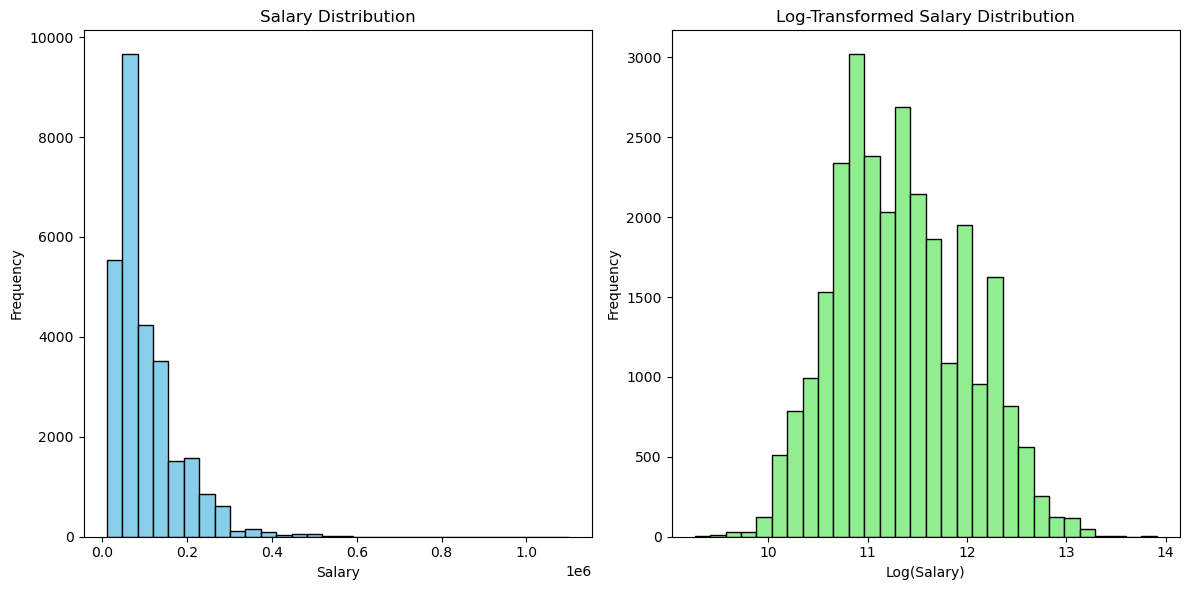

In [41]:
### для лучшей работы линейных моделей нам хорошо бы логарифмировать таргет
### но логарифмирование таргета портит нам интерпретацию коэфов в линейных моделях каж
### Если захотим оценить важность признаков и вклад в таргет
### то можем сделать PermutationImportance + Shapely Values
### Заодно сможем сравнить с более сложными моделями

df['log_salary'] = np.log(df['salary'])
fig, axes = plt.subplots(1,2, figsize = (12,6))
axes[0].hist(df['salary'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Salary Distribution')
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['log_salary'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Log-Transformed Salary Distribution')
axes[1].set_xlabel('Log(Salary)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Про метрики

Хотим использовать
1. MAPE
2. Доля предсказаний в интервале n% от реального таргета (по дефолту берем 10%)

Почему **MAPE**
1. ошибка в 10к рублей, когда зп 50к и когда 500к очень по-разному ощущается для кандидата, поэтому метрика нужна такая, что предсказыавет относительную ошибку
2. несимметричная метрика, как раз недопрогнозы хотим штрафовать меньше, чем перепрогнозы
3. достойно работает с выбросами в рублях (так как благодаря рублю у нас все зп в десятках тысячах и отличаются в пределе 1-2 порядков)
   - совсем маленькие неправдоподобные мы фильтруем (где мы будем во много раз перепрогнозировать)
   - на больших выбросах модель сделает недопрогнох скорее всего. MAPE на объекте будет до 100%. При делении на объем выборки будет совсем незаметно

Почему **Доля предсказаний в интервале n% от реального таргета**
1. нам важно, в какой доле объектов мы ошиблись в пределах разумного (не только в среднем минимизируем ошибку, но чтобы пользователь мог доверять прогнозам, которые мы выдаем на конкретных объектах-вакансиях)

П.с.
1. Чем меньше MAPE, тем лучше (ошибка)
2. Чем больше доля предсказаний в интервале, тем лучше (точность)


In [42]:
def MAPE(y_true, y_pred):
  """
  Compute Mean Absolute Percentage Error (MAPE)

  Input:
  y_true (array-like): Actual target values
  y_pred (array-like): Predicted target values

  Returns:
  float: MAPE as a percentage
  """
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  ### избегаем нули, чтобы корректно отработало
  non_zero_mask = y_true != 0
  percentage_errors = np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])
  return np.mean(percentage_errors) * 100

In [56]:
def share_within_indifference_interval(y_true, y_pred, percentage):
  """
  Share of predicted targets within percentage interval of true targets

  Input:
  y_true (array-like): Actual target values
  y_pred (array-like): Predicted target values

  Returns:
  float: Share as percentage
  """
  x = (y_pred - y_true) / y_true
  return ((x <= percentage / 100) & (x >= -percentage / 100)).mean() * 100

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop(['salary_from','salary_to', 'salary','log_salary'], axis = 1)
X = X[
[
    'area_name', 'accredited_it_employer', 'schedule', 'employment', 'experience', 
    'count_key_skills', 'descr_len', 'professional_roles_name', 'field', 'role', 'grade'
]
]
X['accredited_it_employer'] = X['accredited_it_employer'].fillna(0).astype(int)

y = df['salary']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Оцениваем качество среднего и медианы

In [59]:
mean = np.mean(y_train)
median = np.median(y_train)
y_test_pred_mean = [mean for _ in y_test]
y_test_pred_median = [median for _ in y_test]
indiff_percentage = 10

print(f'Среднее: MAPE на тесте = {MAPE(y_test, y_test_pred_mean):.2f}%')
print(f'Среднее: Доля близко угаданных зп на тесте = {share_within_indifference_interval(y_test, y_test_pred_mean, indiff_percentage):.2f}%')
print()
print(f'Медиана: MAPE на тесте = {MAPE(y_test, y_test_pred_median):.2f}%')
print(f'Медиана: Доля близко угаданных зп на тесте = {share_within_indifference_interval(y_test, y_test_pred_median, indiff_percentage):.2f}%')

Среднее: MAPE на тесте = 78.10%
Среднее: Доля близко угаданных зп на тесте = 10.16%

Медиана: MAPE на тесте = 56.76%
Медиана: Доля близко угаданных зп на тесте = 8.89%


### Оцениваем качество простого линрега по вещественными признакам с нормализовацией
(пропуски заполнены средними)

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

categorical_features = ['area_name', 'schedule', 'employment', 'experience', 'professional_roles_name', 'field', 'role', 'grade']
numerical_features = ['count_key_skills', 'descr_len']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [62]:
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)

print(f'Линрег по таргету: MAPE на тесте = {MAPE(y_test, y_test_pred):.2f}%')
print(f'Линрег по таргету: Доля близко угаданных зп на тесте = {share_within_indifference_interval(y_test, y_test_pred, indiff_percentage):.2f}%')

Линрег по таргету: MAPE на тесте = 39.60%
Линрег по таргету: Доля близко угаданных зп на тесте = 19.73%


C:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [61]:
pipeline.fit(X_train, np.log(y_train))
y_test_pred = np.exp(pipeline.predict(X_test))

print(f'Линрег по логтаргету: MAPE на тесте = {MAPE(y_test, y_test_pred):.2f}%')
print(f'Линрег по логтаргету: Доля близко угаданных зп на тесте = {share_within_indifference_interval(y_test, y_test_pred, indiff_percentage):.2f}%')

Линрег по логтаргету: MAPE на тесте = 30.97%
Линрег по логтаргету: Доля близко угаданных зп на тесте = 23.13%


C:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
import joblib

joblib.dump(pipeline, 'jobmarket_model.pkl')